In [2]:
import numpy as np
import scipy.stats as stats
import scipy.special as special
from matplotlib import pyplot as plt
from collections import Counter

Text(0, 0.5, '$P(k)$')

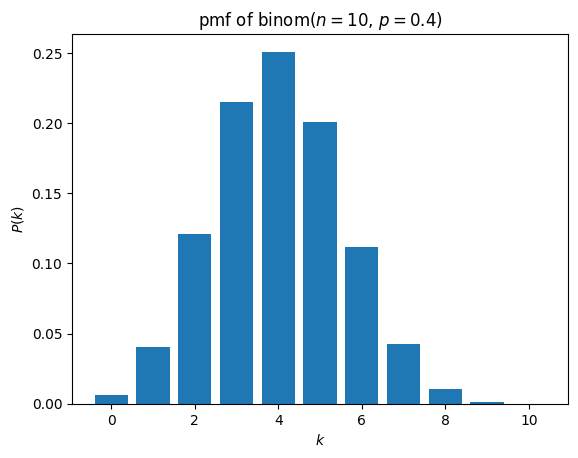

In [3]:
n = 10
p = 0.4

pmf = stats.binom(n=n, p=p).pmf
assert np.allclose([special.binom(n, k)*p**k*(1 - p)**(n - k) for k in range(n + 1)], pmf(range(n + 1)))

plt.bar(range(n + 1), pmf(range(n+1)))
plt.title(f"pmf of binom($n={n}$, $p={p}$)");
plt.xlabel("$k$")
plt.ylabel("$P(k)$")

In [4]:
cdf = stats.binom(n, p).cdf
cdf(3)
assert np.isclose(cdf(3), pmf(0) + pmf(1) + pmf(2) + pmf(3))


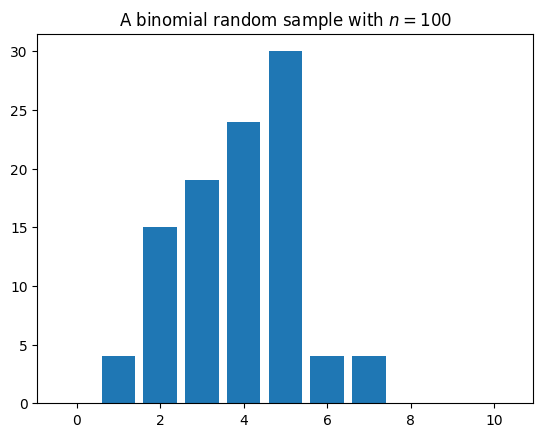

In [5]:
rng = np.random.default_rng(42)
x = rng.binomial(n, p, size=100)
counter = Counter(x)
y = [counter[k] for k in range(n + 1)]
plt.bar(range(n + 1), y)
plt.title("A binomial random sample with $n=100$");

In [6]:
[stats.binom(n=n, p=p).pmf(k) for k in range(n + 1)]

[0.006046617599999921,
 0.040310783999999995,
 0.12093235199999999,
 0.21499084799999982,
 0.250822656,
 0.20065812479999998,
 0.11147673600000013,
 0.04246732799999997,
 0.01061683200000001,
 0.001572864,
 0.00010485760000000006]

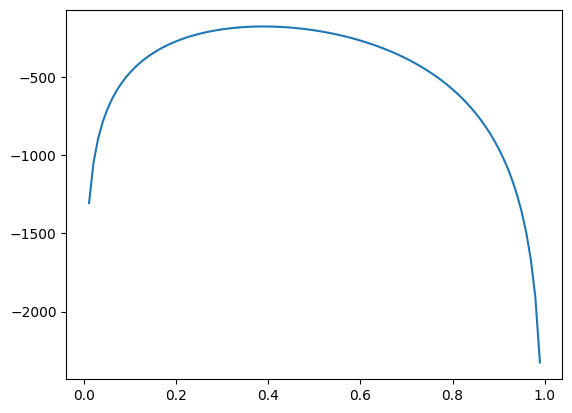

In [7]:
ps = np.linspace(0, 0.99, 100)
z = np.array([stats.binom(n, p).logpmf(x).sum() for p in ps])
plt.plot(ps, z)

In [8]:
stats.binom(n, 0.39).logpmf(x).sum()

-176.27630334581582

In [9]:
n = 10
p = 0.4
N = 50
rng = np.random.default_rng(42)
n_iter = 100000
mles = np.zeros(n_iter)
logpmf = stats.binom(n, p).logpmf
ps = np.linspace(0.01, 0.99, 99).reshape(1, -1)

for i in range(n_iter):
    k = rng.binomial(n, p, size=N).reshape(-1, 1)
    j = stats.binom.logpmf(k=k, n=n, p=ps).sum(axis=0).argmax()
    mles[i] = ps[0, j]

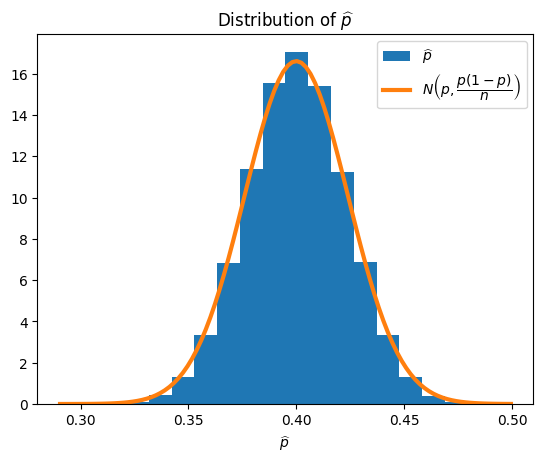

In [18]:
plt.hist(mles, bins=18, density=True, label="$\\widehat{p}$")
plt.xlabel("$\\widehat{p}$")
plt.title("Distribution of $\widehat{p}$")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, loc=p, scale=p*(1-p)/n)
plt.plot(x, y, lw=3, label="$N\\left(p, \\dfrac{p(1-p)}{n}\\right)$")
plt.legend();


2.309401076758502


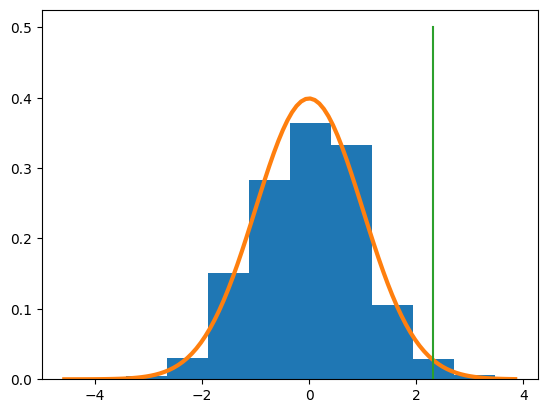

In [142]:
rng = np.random.default_rng(42)
N = 20
n = 10
p = 0.4
n_iter = 10000
phats = np.zeros(n_iter)
for i in range(n_iter):
    y = stats.binom.rvs(n=n, p=0.4, size=N, random_state=rng)
    phats[i] = y.mean()/n

yy = stats.binom.rvs(n=n, p=0.48, size=N, random_state=rng)
phat = yy.mean()/n
Z = np.sqrt(N)*(phat - p)/np.sqrt(p*(1-p)/n)
print(Z)


plt.hist(np.sqrt(N)*(phats - p)/np.sqrt(p*(1-p)/n), density=True);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.norm().pdf(x), lw=3);
plt.plot([Z, Z], [0, 0.5])

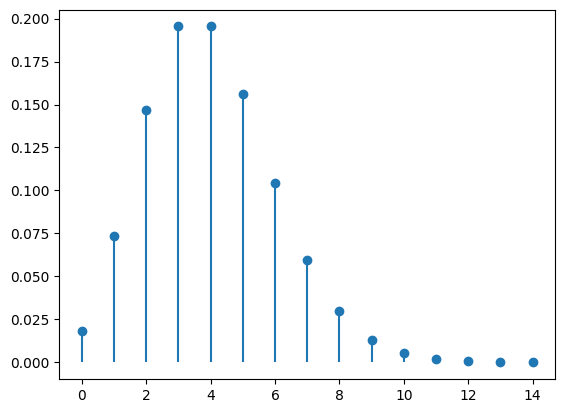

In [158]:
y = np.arange(15)
p = stats.poisson(4).pmf(y)
plt.vlines(y, np.zeros_like(y), p)
plt.plot(y, p, 'o')

In [180]:
rng = np.random.default_rng(42)
N = 20
lambda_ = 4
y = stats.poisson.rvs(5, size=N, random_state=rng)
lambdahat = y.mean()
Z = np.sqrt(N)*(lambdahat - lambda_)/np.sqrt(lambda_)
Z

3.0186917696247155

(0.0, 7.0)

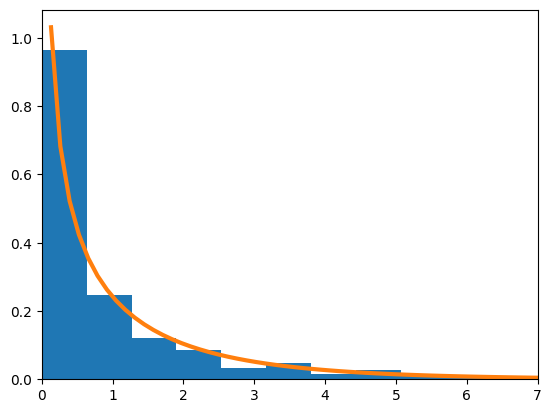

In [216]:
rng = np.random.default_rng(42)
n = 20
a = 4
I = n/a
n_iter = 10000
scores = np.zeros(n_iter)
for i in range(n_iter):
    x = stats.poisson.rvs(a, size=N, random_state=rng)
    U = -n + x.sum()/a
    scores[i] = U**2/I

plt.hist(scores, bins=30, density=True);
x = np.linspace(0, 13, 100)
plt.plot(x, stats.chi2(df=1).pdf(x), lw=3)
plt.xlim(0, 7)

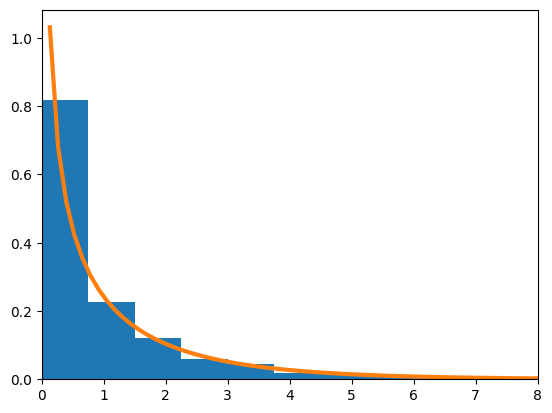

In [225]:
rng = np.random.default_rng(42)
N = 20
n = 10
p = 0.4
I = N*n/(p*(1-p))
n_iter = 100000
scores = np.zeros(n_iter)
for i in range(n_iter):
    x = stats.binom.rvs(n=n, p=p, size=N, random_state=rng)
    U = np.sum(x/p - (n - x)/(1 - p))
    scores[i] = U**2/I

plt.hist(scores, bins=25, density=True)
x = np.linspace(0, 13, 100)
plt.plot(x, stats.chi2(df=1).pdf(x), lw=3)
plt.xlim(0, 8);

## Multinomial Distribution

In [241]:
n = 100
p = np.array([1/2, 1/3, 1- 1/2 - 1/3])
rng = np.random.default_rng(42)
x = np.random.choice([0, 1, 2], p=p, size=(n, 1)) # Multinoulli
np.mean(x == np.array([[0, 1, 2]]), axis=0)

array([0.48, 0.39, 0.13])

In [242]:
stats.multinomial.rvs(n, p, random_state=rng)

array([55, 27, 18])

In [254]:
n = 100
p0 = np.array([1/3, 1/3, 1/3])
nj = stats.multinomial.rvs(n, p, random_state=rng)
muj = n*p0
np.sum((nj - muj)**2/muj)


16.94

In [264]:
stats.chi2(df=2).ppf(0.999)

13.815510557964274

In [259]:
stats.chi2(df=2).cdf(6)

0.950212931632136

### Example: Pneumonia infections in calves

A sample of 156 dairy calves were classified according to whether they caught pneumonia within 60 days of birth.
Calves that got a pneumonia infection were also classified according to whether they got a secondary infection within 2 weeks after the first infection cleared up.

| | SI-YES | SI-NO |
|-|--------|-------|
|PI-YES|30|63|
|PI-NO|0|63|

Is it likely the probability of primary infection was the same as the probability of secondary infection?

Assume it is (null hypothesis).

P(YES-YES) = $\pi^2$

In [270]:
# Probability of primary infection
print((30 + 63)/156)
# Probability of secondary given primary
print(30/(30 + 63))

0.5961538461538461
0.3225806451612903


In [277]:
n = 156
p0 = 0.494
nj = np.array([30, 63, 63])
muj = n*np.array([p0**2, p0*(1 - p0), 1 - p0])
np.sum((nj - muj)**2/muj)

19.706028544472918

array([24.4036, 24.9964, 50.6   ])

In [274]:
n

100